In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Users\\saira\\OneDrive\\Desktop\\new\\crime_cleaned_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916993 entries, 0 to 916992
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DR_NO                         916993 non-null  int64  
 1   Date Rptd                     916993 non-null  object 
 2   DATE OCC                      916993 non-null  object 
 3   TIME OCC                      916993 non-null  object 
 4   AREA                          916993 non-null  int64  
 5   AREA NAME                     916993 non-null  object 
 6   Rpt Dist No                   916993 non-null  int64  
 7   Part 1-2                      916993 non-null  int64  
 8   Crm Cd Desc                   916993 non-null  object 
 9   Mocodes                       916993 non-null  object 
 10  Vict Age                      916993 non-null  float64
 11  Vict Sex                      916993 non-null  object 
 12  Vict Descent                  916993 non-nul

In [5]:
data.isnull().sum()

DR_NO                           0
Date Rptd                       0
DATE OCC                        0
TIME OCC                        0
AREA                            0
AREA NAME                       0
Rpt Dist No                     0
Part 1-2                        0
Crm Cd Desc                     0
Mocodes                         0
Vict Age                        0
Vict Sex                        0
Vict Descent                    0
Premis Cd                       0
Premis Desc                     0
Weapon Used Cd                  0
Weapon Desc                     0
Status                          0
Status Desc                     0
Crm Cd 1                        0
Crm Cd 2                        0
LOCATION                        0
LAT                             0
LON                             0
Weapon Used Category            0
Vict Sex Encoded                0
Vict Descent Encoded            0
Status Desc Encoded             0
Weapon Used Category Encoded    0
DATE OCC Year 

In [6]:
data.shape

(916993, 43)

# Decoding Crime Severity

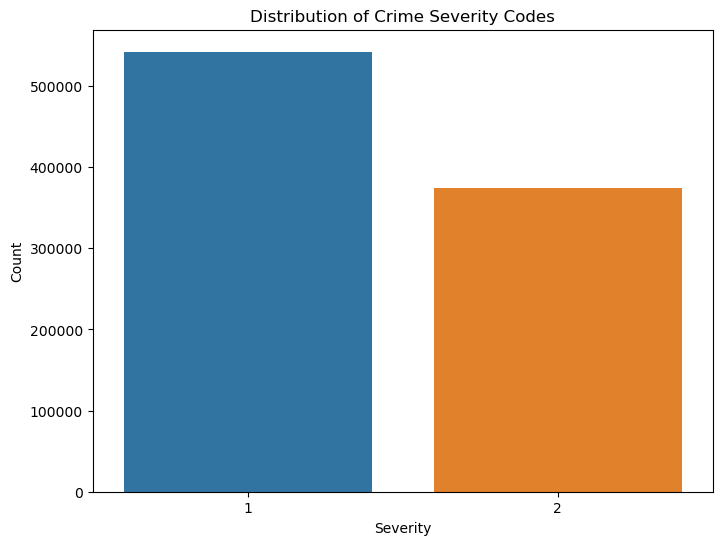

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Part 1-2', data=data)
plt.title('Distribution of Crime Severity Codes')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

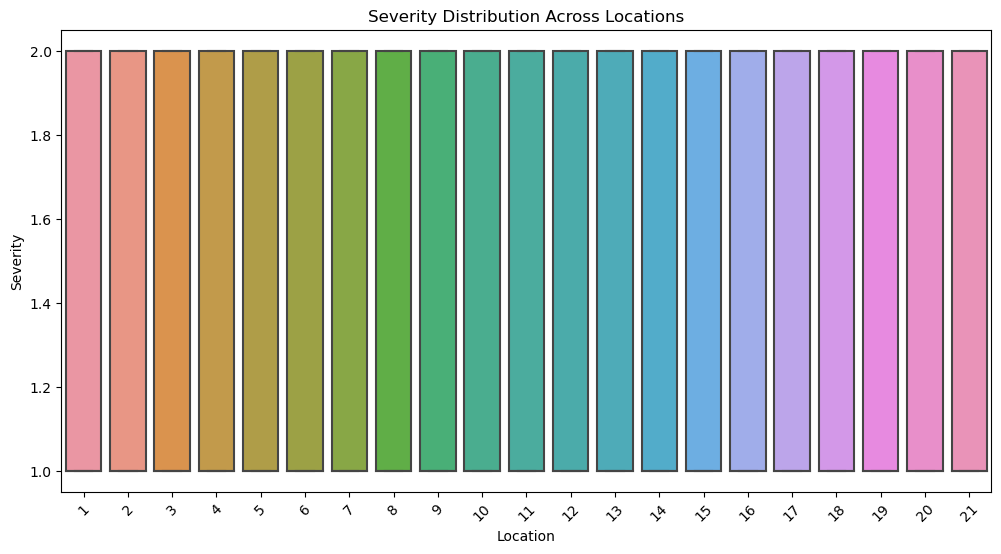

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AREA', y='Part 1-2', data=data)
plt.title('Severity Distribution Across Locations')
plt.xlabel('Location')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()

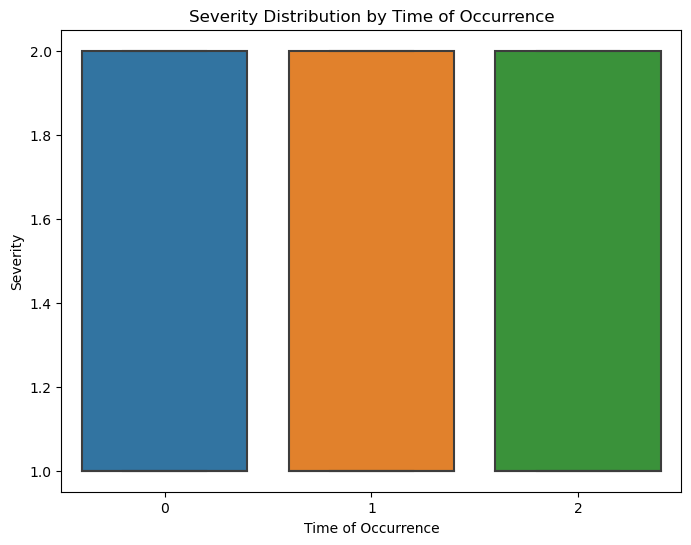

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Time of Day Encoded', y='Part 1-2', data=data)
plt.title('Severity Distribution by Time of Occurrence')
plt.xlabel('Time of Occurrence')
plt.ylabel('Severity')
plt.show()

# Crime Trend Analysis

In [10]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916993 entries, 0 to 916992
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   DR_NO                         916993 non-null  int64         
 1   Date Rptd                     916993 non-null  datetime64[ns]
 2   DATE OCC                      916993 non-null  datetime64[ns]
 3   TIME OCC                      916993 non-null  object        
 4   AREA                          916993 non-null  int64         
 5   AREA NAME                     916993 non-null  object        
 6   Rpt Dist No                   916993 non-null  int64         
 7   Part 1-2                      916993 non-null  int64         
 8   Crm Cd Desc                   916993 non-null  object        
 9   Mocodes                       916993 non-null  object        
 10  Vict Age                      916993 non-null  float64       
 11  Vict Sex     

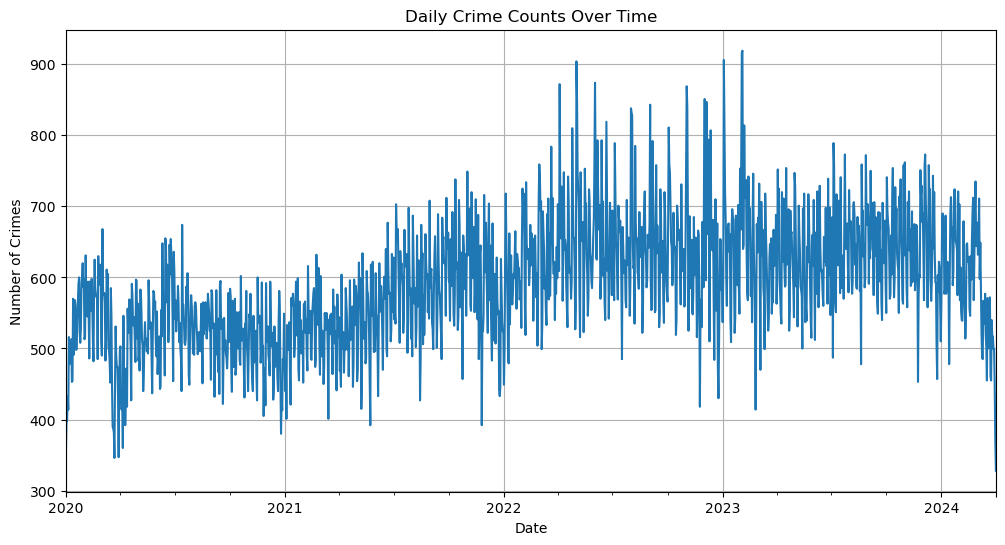

In [13]:

daily_crime_counts = data.groupby('Date Rptd').size()

plt.figure(figsize=(12, 6))
daily_crime_counts.plot()
plt.title('Daily Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()



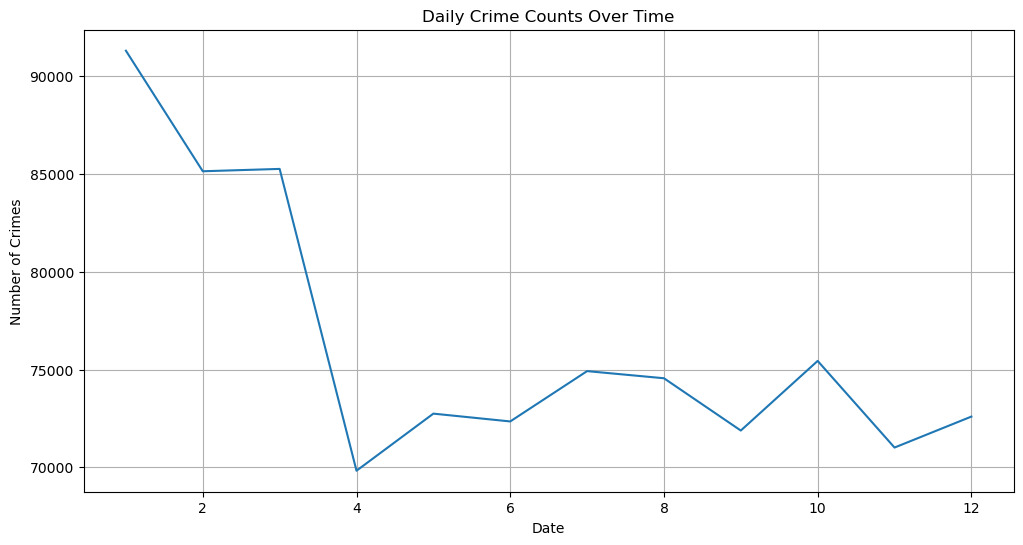

In [17]:

daily_crime_counts = data.groupby('DATE OCC Month').size()

plt.figure(figsize=(12, 6))
daily_crime_counts.plot()
plt.title('Daily Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


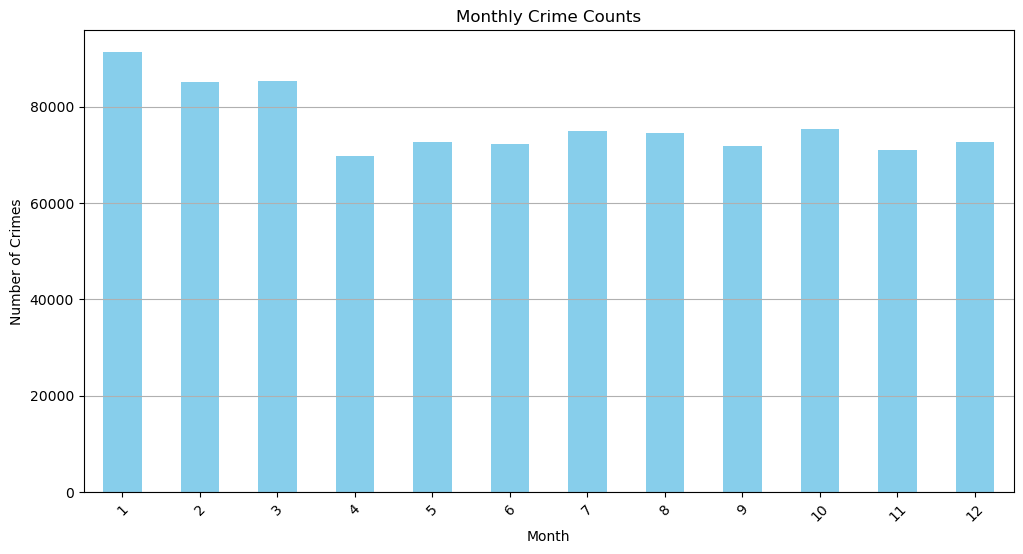

In [14]:
plt.figure(figsize=(12, 6))
data.groupby('DATE OCC Month')['DR_NO'].count().plot(kind='bar', color='skyblue')
plt.title('Monthly Crime Counts')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


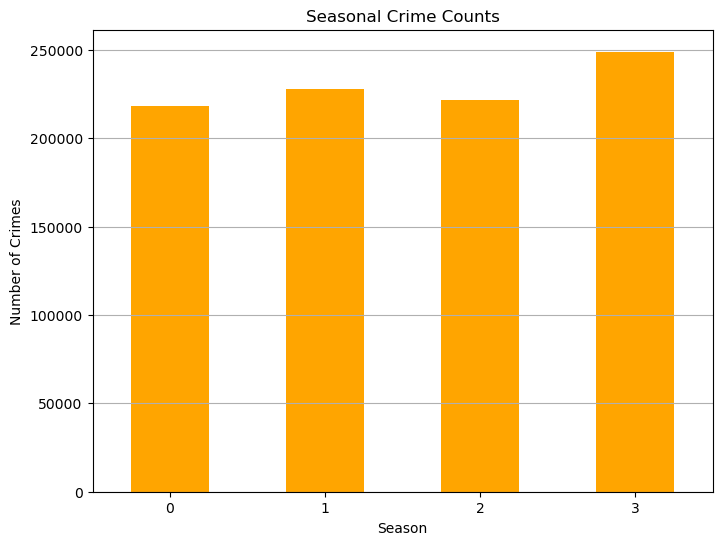

In [16]:
plt.figure(figsize=(8, 6))
data.groupby('Season Encoded')['DR_NO'].count().plot(kind='bar', color='orange')
plt.title('Seasonal Crime Counts')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

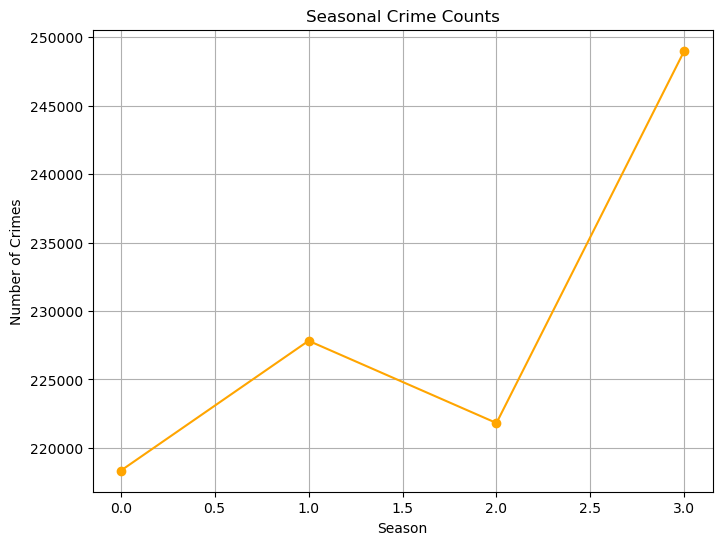

In [22]:
import matplotlib.pyplot as plt

seasonal_crime_counts = data.groupby('Season Encoded')['DR_NO'].count()

plt.figure(figsize=(8, 6))
seasonal_crime_counts.plot(color='orange', marker='o', linestyle='-')
plt.title('Seasonal Crime Counts')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

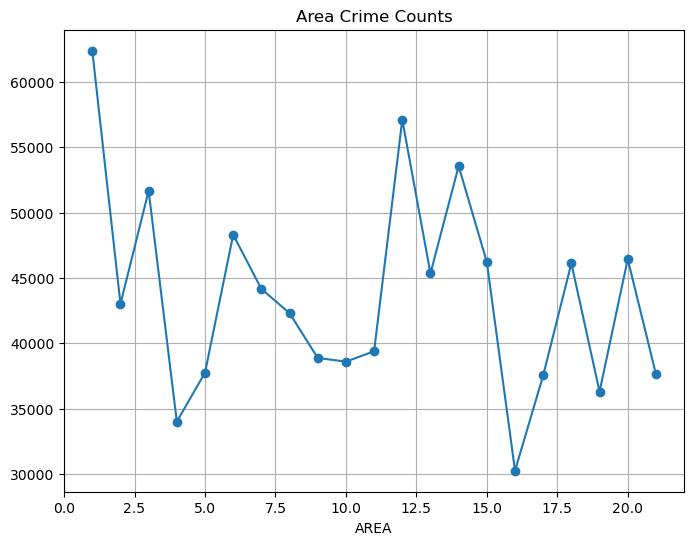

In [26]:
import matplotlib.pyplot as plt

seasonal_crime_counts = data.groupby('AREA')['DR_NO'].count()

plt.figure(figsize=(8, 6))
seasonal_crime_counts.plot( marker='o', linestyle='-')
plt.title('Area Crime Counts')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in ['LOCATION']:
    encoded_column = column + ' Encoded'
    data[encoded_column] = label_encoder.fit_transform(data[column])

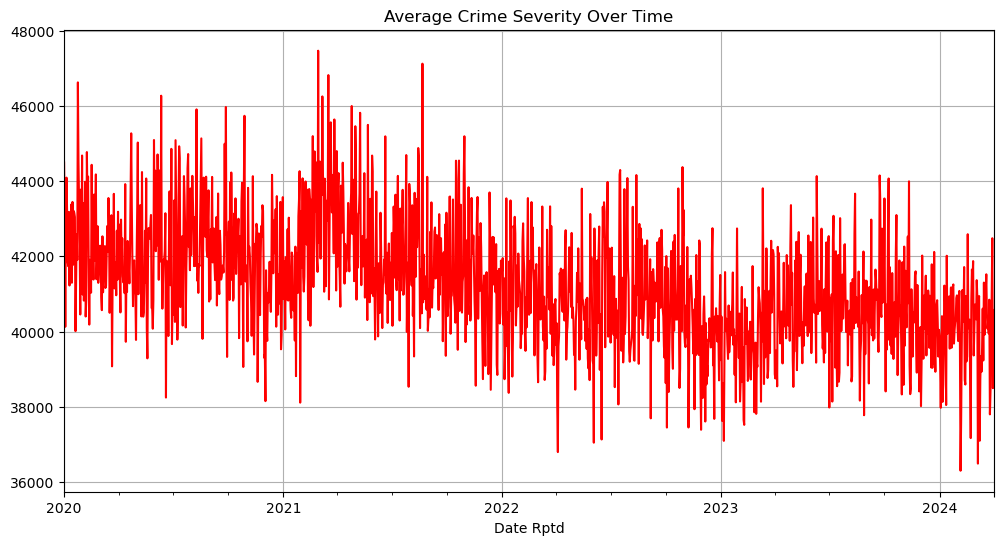

In [36]:
import matplotlib.pyplot as plt

average_severity_by_date = data.groupby('Date Rptd')['LOCATION Encoded'].mean()
plt.figure(figsize=(12, 6))
average_severity_by_date.plot(color='red')
plt.title('Average Crime Severity Over Time')
plt.grid(True)
plt.show()


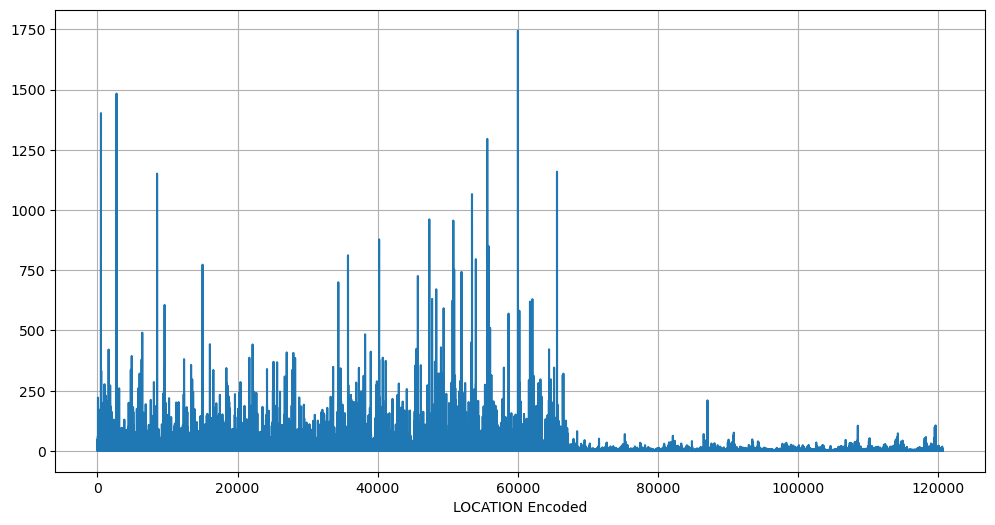

In [31]:
daily_crime_counts = data.groupby('LOCATION Encoded').size()

plt.figure(figsize=(12, 6))
daily_crime_counts.plot()
plt.grid(True)
plt.show()


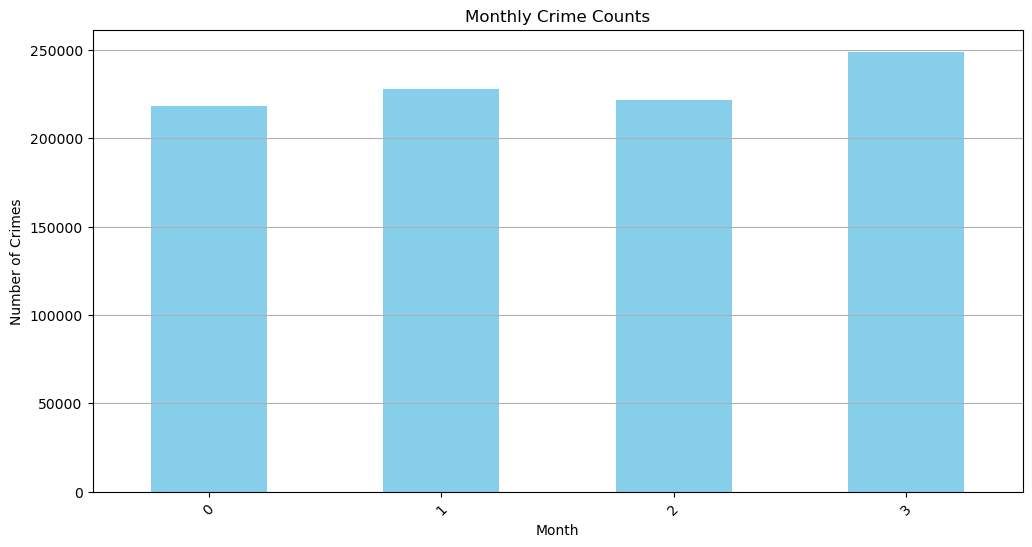

In [32]:
plt.figure(figsize=(12, 6))
data.groupby('Season Encoded')['DR_NO'].count().plot(kind='bar', color='skyblue')
plt.title('Monthly Crime Counts')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

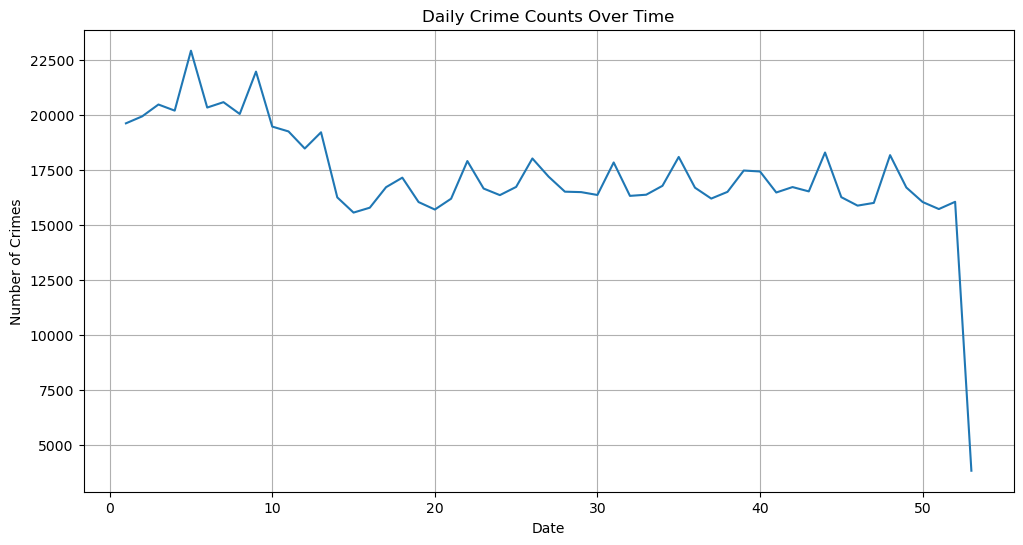

In [33]:

daily_crime_counts = data.groupby('DATE OCC Week').size()

plt.figure(figsize=(12, 6))
daily_crime_counts.plot()
plt.title('Daily Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

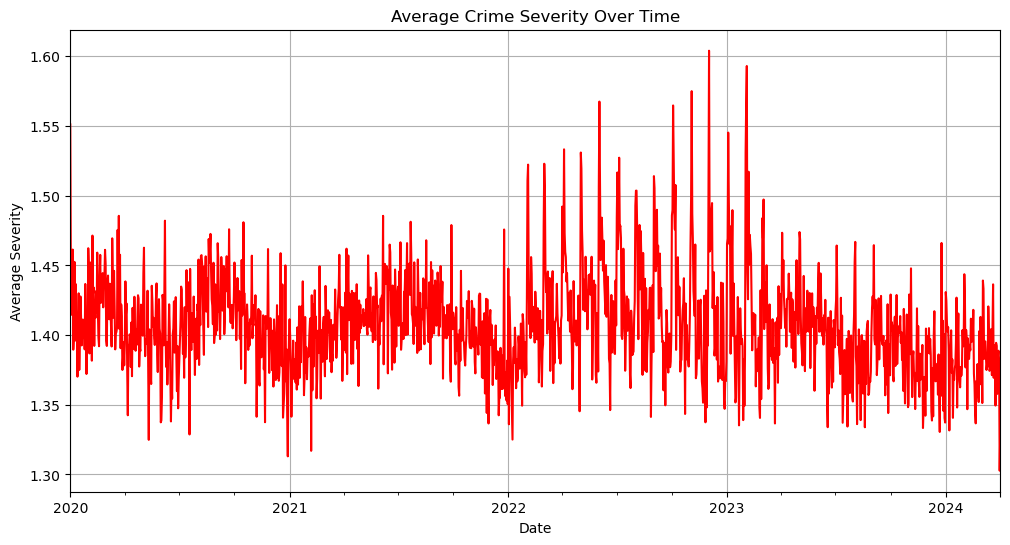

In [34]:

average_severity_by_date = data.groupby('Date Rptd')['Part 1-2'].mean()

# Plot crime severity over time
plt.figure(figsize=(12, 6))
average_severity_by_date.plot(color='red')
plt.title('Average Crime Severity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Severity')
plt.grid(True)
plt.show()


# High-Crime Area Identification

In [42]:
columns_of_interest = ['LAT', 'LON', 'AREA', 'Weapon Used Category Encoded', 'Vict Age', 
                       'Vict Sex Encoded', 'Vict Descent Encoded', 'Season Encoded', 'Hour', 'Time of Day Encoded', 
                       'On Holidays Encoded']
filtered_data = data[columns_of_interest].dropna().astype(int)

In [43]:
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

X = filtered_data.drop('AREA', axis=1) 
y = filtered_data['AREA']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.14584594245333943
Classification Report:
              precision    recall  f1-score   support

           1       0.12      0.14      0.13     12479
           2       0.08      0.08      0.08      8418
           3       0.19      0.23      0.20     10351
           4       0.08      0.08      0.08      6795
           5       0.25      0.25      0.25      7507
           6       0.10      0.10      0.10      9554
           7       0.08      0.08      0.08      8893
           8       0.09      0.09      0.09      8599
           9       0.07      0.06      0.06      7734
          10       0.08      0.07      0.08      7802
          11       0.07      0.07      0.07      7933
          12       0.34      0.36      0.35     11465
          13       0.07      0.06      0.06      9074
          14       0.35      0.33      0.34     10754
          15       0.10      0.10      0.10      9286
          16       0.06      0.05      0.06      6058
          17       0.06     

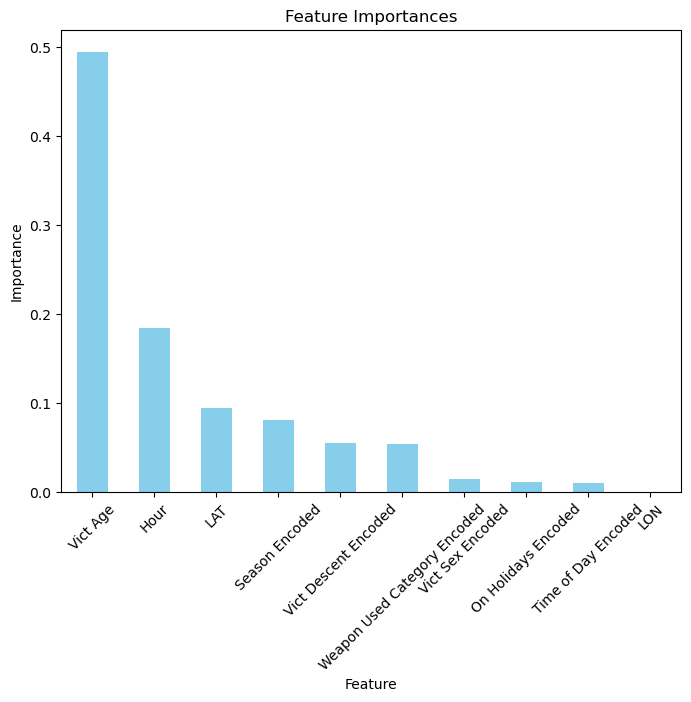

In [44]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(8, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [46]:

percentage_per_area = (filtered_data['AREA'].value_counts() / len(filtered_data['AREA'])) * 100

print("Percentage of occurrence for each unique value in the target variable 'AREA':")
print(percentage_per_area)


Percentage of occurrence for each unique value in the target variable 'AREA':
AREA
1     6.802560
12    6.227092
14    5.840175
3     5.634067
6     5.268088
20    5.064161
15    5.040060
18    5.028937
13    4.945294
7     4.815740
2     4.690876
8     4.613339
11    4.295889
9     4.240163
10    4.209083
5     4.116825
21    4.106138
17    4.094797
19    3.958373
4     3.708971
16    3.299371
Name: count, dtype: float64
